<a href="https://colab.research.google.com/github/aca22nla/com3502/blob/main/Lab-Sheets/Lab-Sheet-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Sheet 2 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") by clicking on the icon on the right, but this notebook is displayed best when opened locally using Jupyter Notebook (e.g. as part of the [Anaconda](https://www.anaconda.com/) distribution which is already installed on the lab computers). <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-2.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs):</strong><br>
    
After completing this Jupyter Notenook you should
    
<ul>
<li>be able to write and call a function in Python
</li>
<li>generate a concert pitch signal
</li>
<li>cut out a desired part from a given vector and concatenate vectors
</li>
<li>understand the concept of signal superposition
</li>
<li>understand the relation between frequency $f$ and notes played by a musical instrument
</li>
<li>understand differences in sampling frequencz $f_s$ and how to resample signals using the <code>librosa</code> library
</li>
    
<li>understand basic use of <code>Python</code> command(s)
    <ul>
        <li><code>None</code></li>
    </ul> and functions from the <code>Python</code> libraries
    <ul>
    <li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html"><code>specgram()</code></a>,
        etc.)
    </li>
    <li><a href="https://numpy.org/doc/stable/index.html"><code>Numpy</code></a> command
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html"><code>concatenate()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html"><code>exp()</code></a>,
        etc.
    </li>
    <li><a href="https://librosa.org/doc/main/index.html"><code>librosa</code></a> command
        <a href="https://librosa.org/doc/main/generated/librosa.resample.html"><code>resample()</code></a>,
        etc.
    </li>
    </ul>
</li>
</ul>
</div>

In [2]:
# Let's do some necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling (optional)
import numpy as np               # math

## Generate sine wave

We are already familiar with generating sine signals from last lab sheet. Since we will need a lot of sine signals this time, it makes sense to create a function calculating a sine.
<br>
<div class="alert alert-block alert-info">
    
**Task 1: A function to create sine waves**
    
Please write a function <code>get_sine_wave(frequency_hz, length_s, sample_rate_hz)</code> which returns a sine wave with the given frequency $f$ and duration (in seconds) at the desired sample rate $f_s$.
</div>


In [3]:
def get_sine_wave(frequency_Hz, length_s=1, fs_Hz=8000):
    """
    Return a sine wave with given parameters.

    Parameters
    ----------
    frequency_Hz : float
        frequency $f$ of the sinus to be generated
    length_s : float, optional
        length of the sine signal to be generated, default: 1 sec.
    fs_Hz : float, optional
        sampling frequency $f_s$ in Hz, default: 8000 Hz

    Returns
    -------
    signal
        generated sinus signal
    """

    # your code here
    dt = 1/fs_Hz                # seconds per sample
    t = np.arange(0,length_s,dt)                          # time vector in seconds

    sine_signal = np.sin(2*np.pi*frequency_Hz*t)          # sine wave signal

    return sine_signal # let the function return the sinus signal

Typical sampling rates are $8000 \,\mathrm{Hz}$ or $16000 \,\mathrm{Hz}$ for speech signals and $22050 \,\mathrm{Hz}$ , $44100 \,\mathrm{Hz}$ or $48000 \,\mathrm{Hz}$ for music. We will now use a sampling rate of $8000 \,\mathrm{Hz}$. Further down in this lab sheet we will play around with sampling frequencies.

Sound signls perceiveable by humans are roughly in the range of $20 \,\mathrm{Hz}$ to $20 000 \,\mathrm{Hz}$ (for older persons typically the theoretical upper limit of $20 \,\mathrm{kHz}$ would be lower).

The so called [concert pitch](https://en.wikipedia.org/wiki/Concert_pitch "Open Wikipedia for more information on Concert Pitch") is at $440 \,\mathrm{Hz}$.
We now want to generate a concert pitch sine wave of length $2$ seconds with at the sample rate mentioned above and then look at a part of the generated signal to check that it actually resembles a sine wave.
<br>
<div class="alert alert-block alert-info">
    
**Task 2: Visualise the sine wave**
    
Generate and visualise the a concert pitch signal of $2$ seconds length, i.e. the sine signal of frequency $f=440 \,\mathrm{Hz}$, and listen to it. Plese note, that for visualising (plotting) you might want to only plot the first samples. The initial samples of a vector can be selected by `variable_name[0:number_of_samples]` or shorter by `variable_name[:number_of_samples]`.
</div>

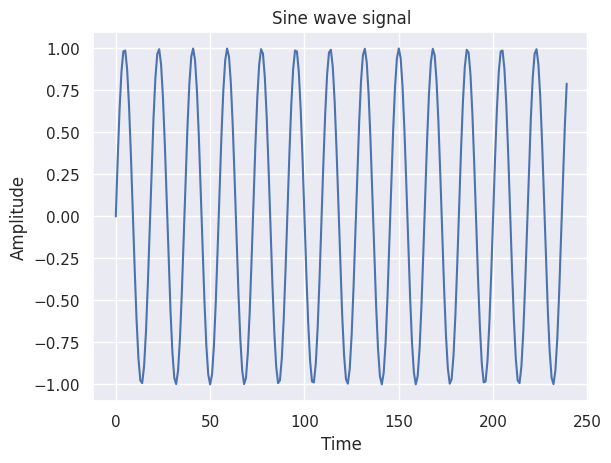

In [4]:
# please complete the following code:

concert_pitch = get_sine_wave(440,2)

# Look at the first 30 ms (240 / 8000 Hz = 0.03 s) of the generated wave

plt.plot(concert_pitch[:240])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Sine wave signal")
plt.show()


None # This command does nothing but prevents printing the result of previous function call

We can concatenate signals to form a longer signal.
As an example we want to create a new signal with half the concert pitch frequency (which we call `half_concert_pitch`) and then play it 2 times alternating with the concert pitch. `numpy`'s `np.concatenate(...)` might be useful for this task.
<br>
<div class="alert alert-block alert-info">
    
**Task 3: Concatenate sine waves of different frequency**
    
<ul>
<li> Generate a second sine signal of same length but with only half the frequency.
</li>
<li> Visualise the generated signal, i.e. the sine signal of frequence $f=220 \,\mathrm{Hz}$. Concetenate the signal blocks alternating to create a signal of 8 seconds. and listen to it.  
</li>
</ul>
</div>

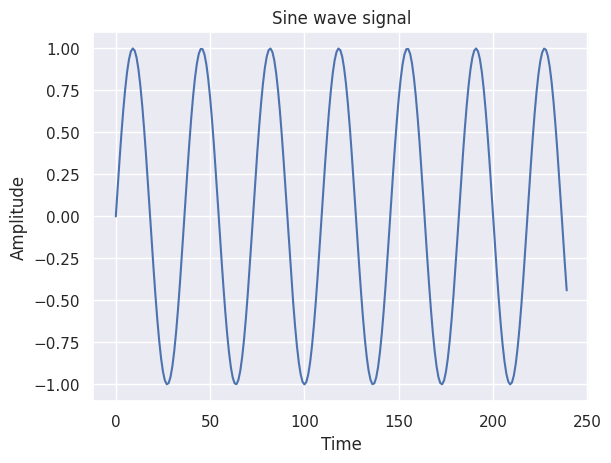

In [5]:
# your code here
half_concert_pitch = get_sine_wave(220,2)

# plot
plt.plot(half_concert_pitch[:240])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Sine wave signal")
plt.show()


alternation = np.concatenate((concert_pitch, half_concert_pitch, concert_pitch, half_concert_pitch))

# play alternating signal
import IPython.display as ipd # for interactive notebook elements
ipd.Audio(alternation, rate=8000)

# ...

Adding together two signals results in a signal for which both frequencies can be heard.
The resulting signal does not look like a sine wave anymore (in time domain) but we can still clearly see its periodicity.
The periodicity is so promiment because one frequency is a multiple of the other.
If this is not the case it can take much longer for the signal to repeat its pattern.
<br>
<div class="alert alert-block alert-info">
    
**Task 4: Superposition**
    
Add, visualise and play a superposition (addition) of two sine signals for which the frequency is close together than in the example before.
</div>

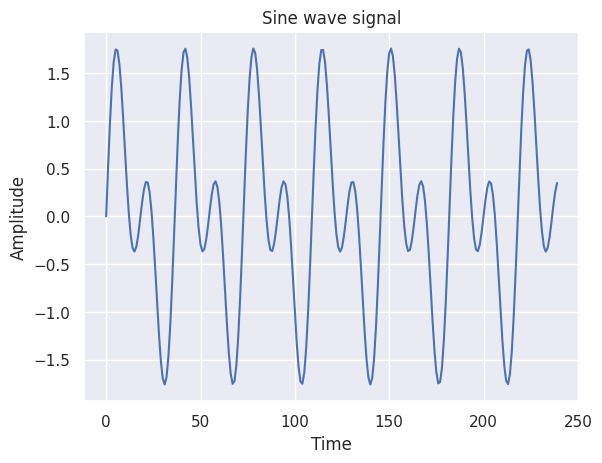

In [6]:
# your code here
superpose = concert_pitch + half_concert_pitch

# plot
plt.plot(superpose[:240])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Sine wave signal")
plt.show()

# play
import IPython.display as ipd # for interactive notebook elements
ipd.Audio(superpose, rate=8000)
# ...

## Damped sine


A damped sine can be defined as

\begin{equation}
x(t) = \mathrm{sin}(2 \pi f t) \, \mathrm{e}^{- a t}.
\label{eq:damped-sinus}
\tag{1}
\end{equation}
<br>
<div class="alert alert-block alert-info">
    
**Task 5: Damped sine wave**
    
<ul>
<li> Create a sine with $f=2.5$ Hz of $1$ second length and plot it.
</li>
<li> Create the damped sinus according to \eqref{eq:damped-sinus} from the just created sine wave.
</li>
<li> Play around with the damping factor $a$.
</li>
</ul>
</div>

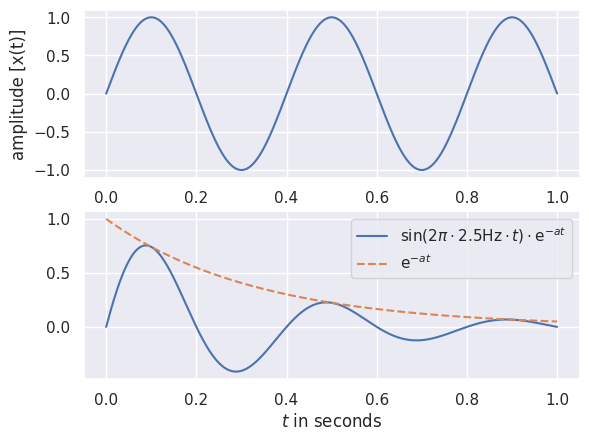

In [7]:
fs=8000
dt = 1/fs
t=np.arange(0,1,dt) # create time vector of 1 second length
f = 2.5               # frequency for sine (2.5 Hz)
a = 3             # daming factor (play around with it and see what happens)

sin  = np.sin(2*np.pi*f*t) # add code here
damp = np.exp(-a*t)
x = sin * damp

plt.subplot(2,1,1)
plt.plot(t,sin)
plt.ylabel("amplitude [x(t)]") # complete code here

plt.subplot(2,1,2)
plt.plot(t,x, label='sin$(2 \pi \cdot ' + str(f) + ' \mathrm{Hz} \cdot t) \cdot \mathrm{e}^{- a t}$')
plt.plot(t,damp, '--', label='$\mathrm{e}^{- a t}$')
plt.legend()
plt.xlabel('$t$ in seconds') # the ; also suppresses output, try to delete it

plt.show()

## Play a song

By generating sine waves of different lengths and frequencies using the function `get_sine_wave` you are now able to play simple songs.

The picture below shows the relation of musical notes to keys of a keyboard.

<img src="https://github.com/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/notes-vs-keys.png?raw=1" alt="Relation between notes and keys of a keyboard." style="width: 500px;"/>

We already learned that each note has a fundamental [frequency](https://pages.mtu.edu/~suits/notefreqs.html), e.g. as in the following table:

| note      | ... |   G3   |   A3   |   B3   |   C4   |   D4   |   E4   |   F4   |   G4   |     A4     |  ...  |
| --------- | --- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ---------- |  ---- |
| $f$ in Hz | ... | 196.00 | 220.00 | 246.94 | 261.63 | 293.66 | 329.63 | 349.23 | 392.00 | **440.00** |  ...  |

Just FYI (knowledge not necessary to solve the task, but maybe nevertheless of interest for some of you):
* The [note A4](https://en.wikipedia.org/wiki/A_(musical_note)) is our reference point and is defined having a frequency of [440 Hz](https://en.wikipedia.org/wiki/A440_(pitch_standard)) (which is why it is marked by bold font in the table  above)
* one [octave](https://en.wikipedia.org/wiki/Octave), e.g. from C to the next C (or from A to the next A), means doubling the frequency
* In general, we can calculate the frequency of a tone by the following equaltion (but it's probaly easier to look it up, e.g. using the link above):

\begin{equation}
f = 440 \cdot 2 ^{(\mathrm{note-position} / 12) + (\mathrm{octave} - 4)}
\end{equation}

<br>
<div class="alert alert-block alert-info">
    
**Task 6: Create and play a song**
    
Create notes G3, A3, B3, D4, C4 and E4 and concatenate the sounds to create your first song.
</div>

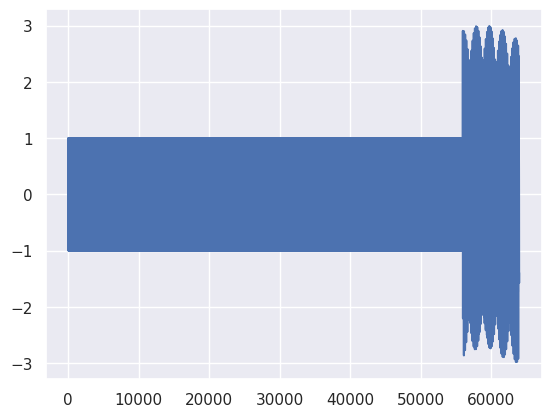

In [11]:
# create basic tones
g = get_sine_wave(196.00)
a = get_sine_wave(220.00)
b = get_sine_wave(246.94)
d = get_sine_wave(293.66)
#...

# append together to form tune + chord
tune = [b,d,a,g,a,b,d,(g+b+d)]
tune = np.concatenate(tune)

# plot:
plt.plot(tune)
plt.show()

#play-back:
import IPython.display as ipd
ipd.Audio(tune, rate=8000)


<div class="alert alert-block alert-info">
    
**Task 7: Create and play a song using damped sine signal parts**
    
Repeat Task 6, but this time creating damped tones (remember equation (<a href="#mjx-eqn-eq:damped-sinus">1</a>)).
</div>

In [ ]:
# your code here
g_damp = g * damp
a_damp = a * damp
b_damp = b * damp
d_damp = d * damp
tune_damped = [b_damp,d_damp,a_damp,g_damp,a_damp,b_damp,d_damp,(g_damp+b_damp+d_damp)]
tune_damped = np.concatenate(tune_damped)

#play-back:
import IPython.display as ipd # for interactive notebook elements
ipd.Audio(tune_damped, rate=8000)


#...

## Sampling Rate
<div class="alert alert-block alert-info">
    
**Task 8: Different Sampling Frequencies**

<ul>
<li> Download the wave file <code>https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/music_44k.wav</code> and load it into a variable.
</li>
<li> Change the sampling frequency from $44.1 \,\mathrm{kHz}$ (which is the original sampling frequency of the loaded WAVE file) to $8 \,\mathrm{kHz}$. Then change the sampling frequency back to $44.1 \,\mathrm{kHz}$. This can be done using the command <code>resample</code> from the <code>librosa</code> library.
</li>
<li> Plot both signals as a time-frequency representation, i.e. as a spectrogram. This can easily be achieved uning the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html"><code>specgram()</code></a> command from the <code>matplotlib</code> library.
</li>
</ul>
</div>

Hint: have a look at last week's lab sheet for loading sound files.

In [13]:
# Download the wave file `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/music_44k.wav`

# your code here
%pip install soundfile
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/music_44k.wav -o music_44k.wav # -o is to ensure file is saved as specified name
# load WAVE files
import soundfile as sf
mus_44k, fs44 = sf.read('music_44k.wav')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  435k  100  435k    0     0   238k      0  0:00:01  0:00:01 --:--:--  238k


You should see in the plotted spectrograms that information above $4 \,\mathrm{kHz}$ originally contained in the signal is now lost.

Note, that if you get an error like
```python
ModuleNotFoundError: No module named 'librosa'
```
you might want to add (i.e. install) the `librosa` library with the following code:
```python
!pip install librosa
```
or by
```python
!conda install -c conda-forge librosa
```

In [15]:
!pip install librosa==0.9.2
# uncomment the previous line for one run if librosa is not yet installed

import librosa         # we will use librosa here for resampling

mus_8k = librosa.resample(mus_44k, fs44, 8000); # resample to 8 kHz
mus_44k_2 = librosa.resample(mus_8k, fs44, 44100)  # resample back to 44.1 kHz

# compare in terms of spectrograms
plt.subplot(1,2,1)
plt.specgram(mus_44k, Fs=fs44);
plt.subplot(1,2,2)
plt.specgram(mus_44k_2, Fs=fs44);
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.2.post1
    Uninstalling librosa-0.10.2.post1:
      Successfully uninstalled librosa-0.10.2.post1


TypeError: resample() takes 1 positional argument but 3 were given

## Copyright

This notebook is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). You may download, [clone](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) or [fork](https://docs.github.com/en/get-started/quickstart/fork-a-repo) it to your computer or private [GitHub](https://github.com/) account.